In [9]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
    
import sys  
sys.path.insert(0, '../src/')

from astropy.table import Table

from jsm_routines import SHMF, CSMF, SHMR, scatter_stat
import os

In [2]:
as_data = np.load("../../data/12_4_0/numpy/acc_surv_mass.npy")
as_red = np.load("../../data/12_4_0/numpy/acc_surv_redshift.npy")

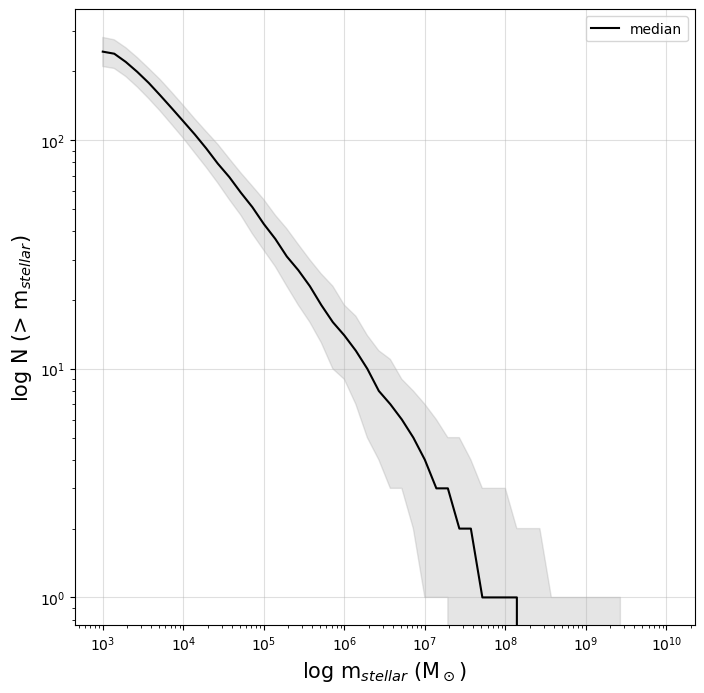

In [3]:
Ms = SHMR(as_data)

surv_massr, surv_CSMF = CSMF(Ms) # accreation mass of the surviving halos!

In [4]:
scatter_pix = 50

scatter_range = np.linspace(0,.4,scatter_pix)

In [5]:
mat = np.zeros(shape=(scatter_pix, 3, 50))

for i,val in enumerate(scatter_range):
    
    surv_massr_i, surv_CSMF_i = CSMF(SHMR(as_data, scatter=val), plot=False) 

    mat[i] = surv_CSMF_i

In [6]:
norm = mpl.colors.Normalize(vmin=scatter_range.min(), vmax=scatter_range.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis_r)

colors = mpl.cm.viridis_r(np.linspace(0, 1, scatter_pix))

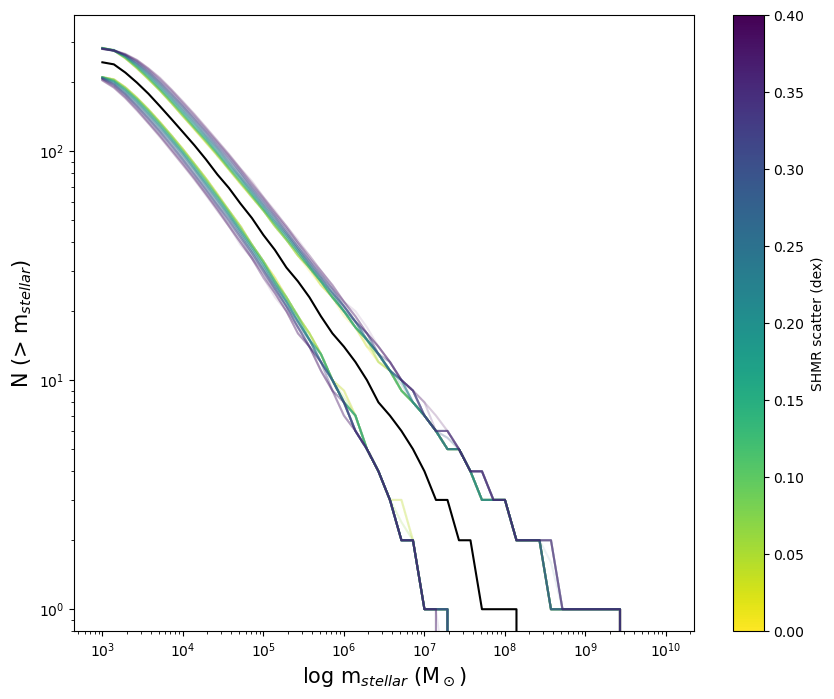

In [7]:
plt.figure(figsize=(10,8))

for i,val in enumerate(mat):
    
    plt.plot(surv_massr, val[0,:], alpha=0.1, color=colors[i])
    plt.plot(surv_massr, val[2,:], alpha=0.1, color=colors[i])

plt.plot(surv_massr, surv_CSMF[1,:], color="black")

plt.yscale("log")
plt.xscale("log")
plt.colorbar(cmap, label="SHMR scatter (dex)")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("N (> m$_{stellar}$)", fontsize=15)
plt.ylim(0.8)
plt.show()

In [11]:
stat = scatter_stat(mat, surv_CSMF)

m4 = stat[:,8]
m5 = stat[:,15]
m6 = stat[:,22]

returning a 50 by 50 matrix


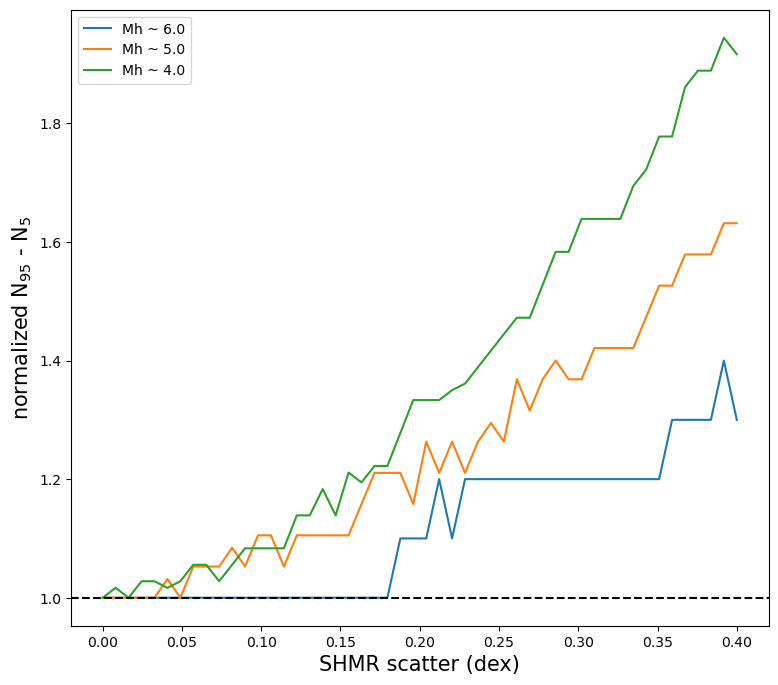

In [12]:
plt.figure(figsize=(9,8))

plt.plot(scatter_range, m6, label="Mh ~ "+str(np.round(np.log10(surv_massr[22]))))
plt.plot(scatter_range, m5, label="Mh ~ "+str(np.round(np.log10(surv_massr[15]))))
plt.plot(scatter_range, m4, label="Mh ~ "+str(np.round(np.log10(surv_massr[8]))))


plt.axhline(1, color="black", ls="--")
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("normalized $\mathrm{N}_{95}$ - $\mathrm{N}_{5}$", fontsize=15)
plt.legend()
plt.show()
plt.show()

### now sampling 100 values of scatter

In [13]:
N = 100

mat = np.zeros(shape=(N, scatter_pix, 3, 50))

for j in range(N):

    for i,val in enumerate(scatter_range):
        
        surv_massr_i, surv_CSMF_i = CSMF(SHMR(as_data, scatter=val), plot=False) 

        mat[j, i] = surv_CSMF_i

In [14]:
stat = scatter_stat(mat, surv_CSMF)

m4 = stat[:,8]
m5 = stat[:,15]
m6 = stat[:,22]

averaging over the samples!
returning a 50 by 50 matrix


/Users/jsmonzon/Research/SatGen/notebooks/../src/jsm_routines.py:268: RuntimeWarning: divide by zero encountered in divide
  stat = (CSMF[:,2]-CSMF[:,0])/(det_CSMF[2]-det_CSMF[0])
/Users/jsmonzon/Research/SatGen/notebooks/../src/jsm_routines.py:268: RuntimeWarning: invalid value encountered in divide
  stat = (CSMF[:,2]-CSMF[:,0])/(det_CSMF[2]-det_CSMF[0])


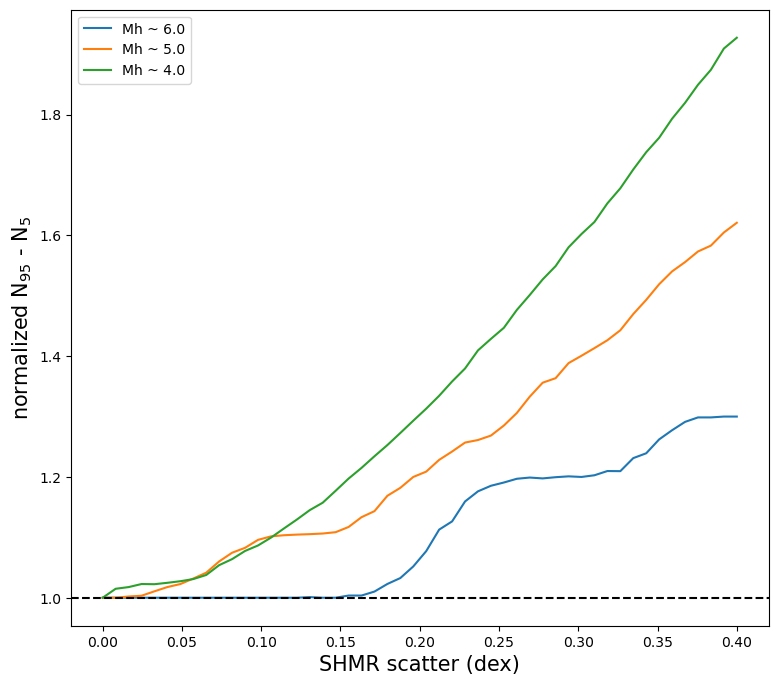

In [15]:
plt.figure(figsize=(9,8))

plt.plot(scatter_range, m6, label="Mh ~ "+str(np.round(np.log10(surv_massr[22]))))
plt.plot(scatter_range, m5, label="Mh ~ "+str(np.round(np.log10(surv_massr[15]))))
plt.plot(scatter_range, m4, label="Mh ~ "+str(np.round(np.log10(surv_massr[8]))))


plt.axhline(1, color="black", ls="--")
plt.xlabel("SHMR scatter (dex)", fontsize=15)
plt.ylabel("normalized $\mathrm{N}_{95}$ - $\mathrm{N}_{5}$", fontsize=15)
plt.legend()
plt.savefig("../figures/CSMF_scatter.pdf")
plt.show()